# Effects of household income on student performance

Candidate numbers: 2210077, 2206664, 2200287

Student ID numbers: 100913283, 100925146, 100914805



In [1]:
from bs4 import BeautifulSoup #import BeautifulSoup
import pandas as pd #import pandas using shorthand notation pd 
import requests #import requests
import statsmodels.api as sm #import statsmodels.api using shorthand notation sm 
import seaborn as sns #import seaborn using shorthand notation sns
import matplotlib.pyplot as plt #import matplotlib.pyplot using shorthand notation plt
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame 

# House Prices

In [2]:
# Read the '1a' sheet from the 'HPSSA Dataset 37 - Median price paid by ward.xls' excel file which can be found in the zip file

xls = pd.read_excel ('median price by ward.xls','1a', header=5)
xls.head()

,Local authority code,Local authority name,Ward code,Ward name,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,...,Year ending Sep 2019,Year ending Dec 2019,Year ending Mar 2020,Year ending Jun 2020,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Unnamed: 108
0,E06000001,Hartlepool,E05008945,Foggy Furze,39000,39000,39000,38625,38250,38250,...,105500,107500,110000,120000,113500,107500,111250,112500,114000,NaN
1,E06000001,Hartlepool,E05008946,Hart,56500,56500,56500,56950,58425,59950,...,148000,146500,149000,150000,155000,160000,164000,167000,164000,NaN
2,E06000001,Hartlepool,E05008947,Headland and Harbour,30950,33950,34975,33950,34950,30750,...,95000,91250,90250,88000,88000,90000,90000,95000,95250,NaN
3,E06000001,Hartlepool,E05008943,De Bruce,38000,38000,37000,30500,30000,30500,...,134000,137975,131475,127475,136000,120000,116000,115000,102750,NaN
4,E06000001,Hartlepool,E05008944,Fens and Rossmere,51000,51000,50000,47975,47500,47500,...,127000,131000,132000,130000,132000,130000,135000,139000,141500,NaN


In [3]:
#selecting required columns
df = xls[["Local authority name", "Ward name","Year ending Sep 2018", "Year ending Sep 2019"]]
#renaming chosen columns
df.columns = ["Local authority name", "Ward name", "Median house price 2018", "Median house price 2019"]
#selecting data only for Croydon, Bromley and Richmond
df1 = df.loc[df['Local authority name'].isin(["Croydon", "Bromley", "Richmond upon Thames"])]

In [4]:
#creating a dataframe for Croydon to help with calculations
df2 = df.loc[df['Local authority name'].isin(["Croydon"])]
df2.head()

,Local authority name,Ward name,Median house price 2018,Median house price 2019
6685,Croydon,Fairfield,305000,350000
6686,Croydon,Bensham Manor,350000,315000
6687,Croydon,Crystal Palace & Upper Norwood,425000,420000
6688,Croydon,Addiscombe East,422000,405000
6689,Croydon,Kenley,475950,450000


In [5]:
#creating a dataframe for Richmond upon Thames to help with calculations
df3 = df.loc[df['Local authority name'].isin(["Richmond upon Thames"])]
df3.head()

,Local authority name,Ward name,Median house price 2018,Median house price 2019
7062,Richmond upon Thames,Fulwell and Hampton Hill,565000,555000
7063,Richmond upon Thames,Hampton,665000,587500
7064,Richmond upon Thames,"Ham, Petersham and Richmond Riverside",640000,655000
7065,Richmond upon Thames,Kew,635000,685000
7066,Richmond upon Thames,Mortlake and Barnes Common,850000,765000


In [6]:
#creating a dataframe for Bromley to help with calculations
df4 = df.loc[df['Local authority name'].isin(["Bromley"])]
df4.head()

,Local authority name,Ward name,Median house price 2018,Median house price 2019
6645,Bromley,Bickley,575000,600000
6646,Bromley,Biggin Hill,367250,362500
6647,Bromley,Bromley Common and Keston,458750,440000
6648,Bromley,Bromley Town,422500,400000
6649,Bromley,Chelsfield and Pratts Bottom,522500,465000


In [7]:
#checking class types
df1.dtypes

Local authority name       object
Ward name                  object
Median house price 2018    object
Median house price 2019    object
dtype: object

In [8]:
#converting objects to integers
df1['Median house price 2018'] = df1['Median house price 2018'].apply(pd.to_numeric)
df1['Median house price 2019'] = df1['Median house price 2019'].apply(pd.to_numeric)
df1.dtypes

/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/3152744355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Median house price 2018'] = df1['Median house price 2018'].apply(pd.to_numeric)
/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/3152744355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Median house price 2019'] = df1['Median house price 2019'].apply(pd.to_numeric)


Local authority name       object
Ward name                  object
Median house price 2018     int64
Median house price 2019     int64
dtype: object

In [9]:
#calculating the average house value for 2018 in Croydon
CM18 = df2["Median house price 2018"].mean()
CM18

397114.28571428574

In [10]:
#calculating the average house value for 2018 in Richmond upon Thames
RM18 = df3["Median house price 2018"].mean()
RM18

681708.3333333334

In [11]:
#calculating the average house value for 2018 in Bromley
BM18 = df4["Median house price 2018"].mean()
BM18

462247.7272727273

In [12]:
#calculating the average house value for 2019 in Croydon
CM19 = df2["Median house price 2019"].mean()
CM19

394158.75

In [13]:
#calculating the average house value for 2019 in Richmond upon Thames
RM19 = df3["Median house price 2019"].mean()
RM19

682206.9444444445

In [14]:
#calculating the average house value for 2019 in Croydon
BM19 = df4["Median house price 2019"].mean()
BM19

456294.3181818182

In [15]:
#descriptive statistics
df1.describe()

,Median house price 2018,Median house price 2019
count,6.800000e+01,6.800000e+01
mean,4.935206e+05,4.905095e+05
std,1.734603e+05,1.773749e+05
min,2.900000e+05,2.900000e+05
25%,3.730625e+05,3.718750e+05
50%,4.668750e+05,4.500000e+05
75%,5.650000e+05,5.562500e+05
max,1.318000e+06,1.370000e+06


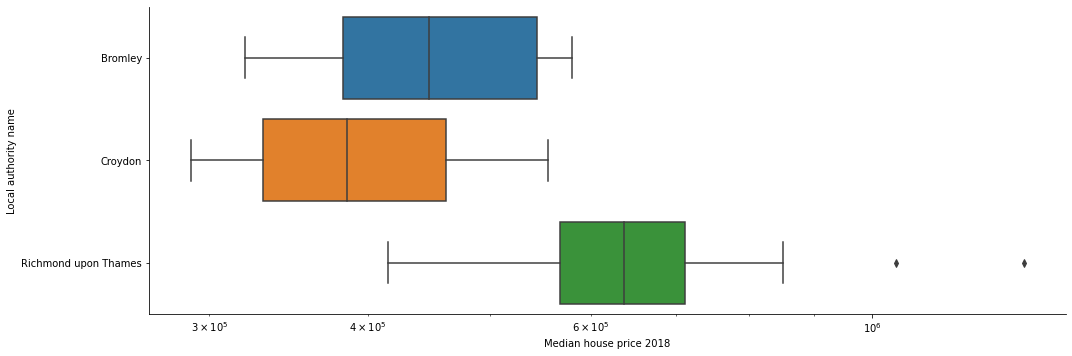

In [16]:
#plotting boxplots of Median house prices in the different boroughs in 2018
g = sns.catplot(x="Median house price 2018", y="Local authority name",
                kind="box", orient="h", height=5, aspect=3, data=df1)
g.set(xscale="log")

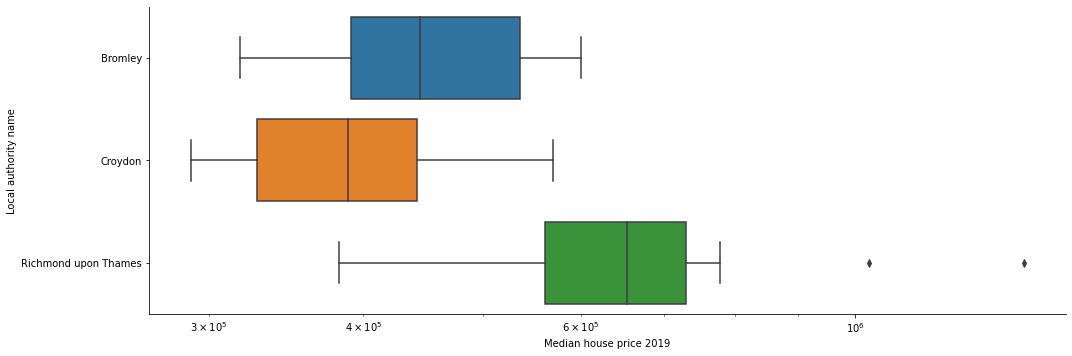

In [17]:
#plotting boxplots of Median house prices in the different boroughs in 2019
g = sns.catplot(x="Median house price 2019", y="Local authority name",
                kind="box", orient="h", height=5, aspect=3, data=df1)
g.set(xscale="log")

# Richmond Schools

In [18]:
#reading the two files with information about schools and results
richmondks4 = pd.read_excel('richmondks4.xlsx')
richmondschinf = pd.read_excel('richmondschinf19.xlsx')
richmondks4_18 = pd.read_excel('richmondks418.xlsx')

#choosing the columns containing the criteria required for both data frames
richmondschinf = richmondschinf[['SCHNAME','TOWN','SCHOOLTYPE','MINORGROUP']]
richmondks4_18 = richmondks4_18[['SCHNAME', 'TOWN', 'TOTPUPS', 'NUMBOYS', 'NUMGIRLS','TEALGRP1', 'TEALGRP2', 'TEBACENG_94', 'TEBACMAT_94']]
richmondks4 = richmondks4[['SCHNAME', 'TEALGRP1', 'TEALGRP2', 'TEBACENG_94', 'TEBACMAT_94']]

#renaming columns to prevent chosen columns from merging
richmondks4.columns = ['SCHNAME','TEALGRP1_1','TEALGRP2_1','TEBACENG_94_1','TEBACMAT_94_1']

#merging the data frames
richmondsch = pd.merge(richmondks4_18, richmondks4)
richmondsch = pd.merge(richmondsch, richmondschinf)

#renaming columns
richmondsch.columns=['School', 'Town','Total number of students', 'Number of Boys', 'Number of Girls','Number of pupils at the end of key stage 4 with English as their first language in 2018','Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018','Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018', 'Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018','Number of pupils at the end of key stage 4 with English as their first language in 2019','Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019','Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019', 'Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019' ,'School type', 'Type of school/college']
richmondsch.head()

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college
0,Hampton High,Hampton,638,322.0,316.0,96,31,103,88,95,40,104,98,Academy sponsor led,Academy
1,Twickenham School,Twickenham,567,313.0,254.0,85,24,67,65,105,26,101,91,Academy sponsor led,Academy
2,Orleans Park School,Twickenham,1224,742.0,482.0,151,46,180,161,152,46,174,170,Academy converter,Academy
3,Teddington School,Teddington,1283,729.0,554.0,209,29,199,179,210,26,208,205,Academy converter,Academy
4,Waldegrave School,Twickenham,1339,86.0,1253.0,156,41,182,168,174,28,194,180,Academy converter,Academy


In [19]:
#selecting schools from Richmond
schoolsinrichmond = richmondsch.loc[richmondsch['Town'].isin(["Richmond"])]

#selecting schools based on type (not including private schools)
pubschrichmond = schoolsinrichmond.loc[schoolsinrichmond['Type of school/college'].isin(["Academy", "Maintained school"])]
pubschrichmond.dropna() #removing NaN values

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college
5,Christ's Church of England Comprehensive Secon...,Richmond,855,513.0,342.0,129,19,123,118,120,29,128,117,Voluntary aided school,Maintained school
10,Grey Court School,Richmond,1339,776.0,563.0,160,33,173,159,174,28,180,169,Academy converter,Academy


In [20]:
pubschrichmond.dtypes #checking if data types are suitable for analysis

School                                                                                           object
Town                                                                                             object
Total number of students                                                                          int64
Number of Boys                                                                                  float64
Number of Girls                                                                                 float64
Number of pupils at the end of key stage 4 with English as their first language in 2018          object
Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018     object
Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018           object
Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018             object
Number of pupils at the end of key stage 4 with English as their

In [21]:
#changing data types to numeric in order to perform exploratory analysis
pubschrichmond['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'] = pubschrichmond['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'].apply(pd.to_numeric)
pubschrichmond['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019'] = pubschrichmond['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019'].apply(pd.to_numeric)
pubschrichmond['Number of pupils at the end of key stage 4 with English as their first language in 2018'] = pubschrichmond['Number of pupils at the end of key stage 4 with English as their first language in 2018'].apply(pd.to_numeric)
pubschrichmond['Number of pupils at the end of key stage 4 with English as their first language in 2019'] = pubschrichmond['Number of pupils at the end of key stage 4 with English as their first language in 2019'].apply(pd.to_numeric)
pubschrichmond['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018'] = pubschrichmond['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018'].apply(pd.to_numeric)
pubschrichmond['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019'] = pubschrichmond['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019'].apply(pd.to_numeric)
pubschrichmond['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018'] = pubschrichmond['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018'].apply(pd.to_numeric)
pubschrichmond['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019'] = pubschrichmond['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019'].apply(pd.to_numeric)

In [22]:
#checking types
pubschrichmond.dtypes

School                                                                                           object
Town                                                                                             object
Total number of students                                                                          int64
Number of Boys                                                                                  float64
Number of Girls                                                                                 float64
Number of pupils at the end of key stage 4 with English as their first language in 2018           int64
Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018      int64
Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018            int64
Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018              int64
Number of pupils at the end of key stage 4 with English as their

In [23]:
#descriptive statistics
pubschrichmond.describe()

,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1097.000000,644.500000,452.500000,144.50000,26.000000,148.000000,138.500000,147.000000,28.500000,154.000000,143.000000
std,342.239682,185.969083,156.270599,21.92031,9.899495,35.355339,28.991378,38.183766,0.707107,36.769553,36.769553
min,855.000000,513.000000,342.000000,129.00000,19.000000,123.000000,118.000000,120.000000,28.000000,128.000000,117.000000
25%,976.000000,578.750000,397.250000,136.75000,22.500000,135.500000,128.250000,133.500000,28.250000,141.000000,130.000000
50%,1097.000000,644.500000,452.500000,144.50000,26.000000,148.000000,138.500000,147.000000,28.500000,154.000000,143.000000
75%,1218.000000,710.250000,507.750000,152.25000,29.500000,160.500000,148.750000,160.500000,28.750000,167.000000,156.000000
max,1339.000000,776.000000,563.000000,160.00000,33.000000,173.000000,159.000000,174.000000,29.000000,180.000000,169.000000


# Bromley Schools

In [24]:
#reading the two files with information about schools and results
bromleyks4 = pd.read_excel('bromleyks4.xlsx')
bromleyschinf = pd.read_excel('bromleyschinf19.xlsx')
bromleyks4_18 = pd.read_excel('bromleyks418.xlsx')


#choosing the columns containing the criteria required for both data frames
bromleyschinf = bromleyschinf[['SCHNAME','TOWN','SCHOOLTYPE','MINORGROUP']]
bromleyks4_18 = bromleyks4_18[['SCHNAME', 'TOWN', 'TOTPUPS', 'NUMBOYS', 'NUMGIRLS','TEALGRP1', 'TEALGRP2', 'TEBACENG_94', 'TEBACMAT_94']]
bromleyks4 = bromleyks4[['SCHNAME', 'TEALGRP1', 'TEALGRP2', 'TEBACENG_94', 'TEBACMAT_94']]

#renaming columns to prevent chosen columns from merging
bromleyks4.columns = ['SCHNAME','TEALGRP1_1','TEALGRP2_1','TEBACENG_94_1','TEBACMAT_94_1']

#merging the data frames
bromleysch = pd.merge(bromleyks4_18, bromleyks4)
bromleysch = pd.merge(bromleysch, bromleyschinf)

#renaming columns
bromleysch.columns=['School', 'Town','Total number of students', 'Number of Boys', 'Number of Girls','Number of pupils at the end of key stage 4 with English as their first language in 2018','Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018','Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018', 'Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018','Number of pupils at the end of key stage 4 with English as their first language in 2019','Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019','Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019', 'Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019' ,'School type', 'Type of school/college']
bromleysch.head()

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college
0,Harris Girls Academy Bromley,Beckenham,855,13,842,73,42,106,91,101,27,116,106,Academy converter,Academy
1,Bishop Justus CofE School,Bromley,1192,638,554,171,6,139,121,172,4,143,108,Academy converter,Academy
2,Bullers Wood School,Chislehurst,1545,99,1446,190,24,197,181,175,39,199,172,Academy converter,Academy
3,Coopers School,Chislehurst,1550,890,660,170,13,137,119,216,19,164,158,Academy converter,Academy
4,Langley Park School for Boys,Beckenham,1731,1492,NaN,212,2,175,167,195,8,162,172,Academy converter,Academy


In [25]:
#selecting schools in Bromley
schoolsinbromley = bromleysch.loc[bromleysch['Town'].isin(["Bromley"])]

#selecting schools by type (not including private schools)
pubschbromley = schoolsinbromley.loc[schoolsinbromley['Type of school/college'].isin(["Academy", "Maintained school"])]
pubschbromley.dropna() #removing NaN values

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college
1,Bishop Justus CofE School,Bromley,1192,638,554,171,6,139,121,172,4,143,108,Academy converter,Academy
6,Hayes School,Bromley,1702,864,838,232,8,201,195,233,6,209,200,Academy converter,Academy
20,The Ravensbourne School,Bromley,1627,1002,625,192,20,163,122,188,23,168,140,Academy converter,Academy


In [26]:
#checking if data types are suitable for analysis/modelling
pubschbromley.dtypes

School                                                                                          object
Town                                                                                            object
Total number of students                                                                        object
Number of Boys                                                                                  object
Number of Girls                                                                                 object
Number of pupils at the end of key stage 4 with English as their first language in 2018         object
Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018    object
Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018          object
Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018            object
Number of pupils at the end of key stage 4 with English as their first la

In [27]:
#changing data types from objects to numerical before analysis/modelling

pubschbromley['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'] = pubschbromley['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'].apply(pd.to_numeric)
pubschbromley['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019'] = pubschbromley['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019'].apply(pd.to_numeric)
pubschbromley['Number of pupils at the end of key stage 4 with English as their first language in 2018'] = pubschbromley['Number of pupils at the end of key stage 4 with English as their first language in 2018'].apply(pd.to_numeric)
pubschbromley['Number of pupils at the end of key stage 4 with English as their first language in 2019'] = pubschbromley['Number of pupils at the end of key stage 4 with English as their first language in 2019'].apply(pd.to_numeric)
pubschbromley['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018'] = pubschbromley['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018'].apply(pd.to_numeric)
pubschbromley['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019'] = pubschbromley['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019'].apply(pd.to_numeric)
pubschbromley['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018'] = pubschbromley['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018'].apply(pd.to_numeric)
pubschbromley['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019'] = pubschbromley['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019'].apply(pd.to_numeric)

/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/102156103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubschbromley['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'] = pubschbromley['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'].apply(pd.to_numeric)
/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/102156103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubschbromley['Nu

In [28]:
#checking data types
pubschbromley.dtypes

School                                                                                           object
Town                                                                                             object
Total number of students                                                                         object
Number of Boys                                                                                   object
Number of Girls                                                                                  object
Number of pupils at the end of key stage 4 with English as their first language in 2018         float64
Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018    float64
Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018          float64
Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018            float64
Number of pupils at the end of key stage 4 with English as their

In [29]:
#descriptive statistics
pubschbromley.describe()

,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000
mean,199.750000,11.750000,167.250000,153.250000,198.750000,11.500000,175.250000,158.2500
std,25.460754,6.238322,25.539186,37.562171,25.914925,8.582929,27.475747,42.0981
min,171.000000,6.000000,139.000000,121.000000,172.000000,4.000000,143.000000,108.0000
25%,186.750000,7.500000,157.000000,121.750000,184.000000,5.500000,161.750000,132.0000
50%,198.000000,10.500000,164.500000,148.500000,195.000000,9.500000,174.500000,162.5000
75%,211.000000,14.750000,174.750000,180.000000,209.750000,15.500000,188.000000,188.7500
max,232.000000,20.000000,201.000000,195.000000,233.000000,23.000000,209.000000,200.0000


# Croydon Schools

In [30]:
#reading the two files with information about schools and results
croydonks4 = pd.read_excel('croydonks4.xlsx')
croydonschinf = pd.read_excel('croydonschinf19.xlsx')
croydonks4_18 = pd.read_excel('croydonks418.xlsx')


#choosing the columns containing the criteria required for both data frames
croydonschinf = croydonschinf[['SCHNAME','TOWN','SCHOOLTYPE','MINORGROUP']]
croydonks4_18 = croydonks4_18[['SCHNAME', 'TOWN', 'TOTPUPS', 'NUMBOYS', 'NUMGIRLS','TEALGRP1', 'TEALGRP2', 'TEBACENG_94', 'TEBACMAT_94']]
croydonks4 = croydonks4[['SCHNAME', 'TEALGRP1', 'TEALGRP2', 'TEBACENG_94', 'TEBACMAT_94']]

#renaming columns to prevent chosen columns from merging
croydonks4.columns = ['SCHNAME','TEALGRP1_1','TEALGRP2_1','TEBACENG_94_1','TEBACMAT_94_1']

#merging the data frames
croydonsch = pd.merge(croydonks4_18, croydonks4)
croydonsch = pd.merge(croydonsch, croydonschinf)

#renaming columns
croydonsch.columns=['School', 'Town','Total number of students', 'Number of Boys', 'Number of Girls','Number of pupils at the end of key stage 4 with English as their first language in 2018','Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018','Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018', 'Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018','Number of pupils at the end of key stage 4 with English as their first language in 2019','Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019','Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019', 'Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019' ,'School type', 'Type of school/college']
croydonsch.head()

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college
0,The Archbishop Lanfranc Academy,Croydon,424,272,152,48,50,64,54,29,49,46,35,Academy sponsor led,Academy
1,Orchard Park High (Croydon),Croydon,918,562,356,133,71,144,119,119,41,125,102,Academy sponsor led,Academy
2,Meridian High School,Croydon,543,264,279,65,11,47,35,85,8,64,42,Academy sponsor led,Academy
3,Woodcote High School,Coulsdon,1233,636,597,185,26,170,156,185,25,178,148,Academy converter,Academy
4,Archbishop Tenison's CofE High School,Croydon,747,362,385,97,9,92,77,101,9,87,74,Voluntary aided school,Maintained school


In [31]:
#selecting schools in Croydon
schoolsincroydon = croydonsch.loc[croydonsch['Town'].isin(["Croydon"])]

#selecting schools by type (not including private schools)
pubschcroydon = schoolsincroydon.loc[schoolsincroydon['Type of school/college'].isin(["Academy", "Maintained school"])]
pubschcroydon.dropna() #removing NaN values

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college
0,The Archbishop Lanfranc Academy,Croydon,424,272,152,48,50,64,54,29,49,46,35,Academy sponsor led,Academy
1,Orchard Park High (Croydon),Croydon,918,562,356,133,71,144,119,119,41,125,102,Academy sponsor led,Academy
2,Meridian High School,Croydon,543,264,279,65,11,47,35,85,8,64,42,Academy sponsor led,Academy
4,Archbishop Tenison's CofE High School,Croydon,747,362,385,97,9,92,77,101,9,87,74,Voluntary aided school,Maintained school
5,St Andrew's CofE School,Croydon,487,271,216,102,27,85,77,93,29,83,68,Voluntary aided school,Maintained school
6,St Mary's Catholic High School,Croydon,542,296,246,48,59,48,39,30,83,68,49,Voluntary aided school,Maintained school
9,Shirley High School Performing Arts College,Croydon,1050,486,564,127,46,123,97,101,72,124,86,Academy converter,Academy
21,Oasis Academy Coulsdon,Croydon,802,425,377,110,26,106,95,128,13,120,91,Academy sponsor led,Academy
22,Oasis Academy Shirley Park,Croydon,1686,851,835,98,59,111,94,106,60,129,98,Academy sponsor led,Academy


In [32]:
#checking if data types are suitable for analysis/modelling
pubschcroydon.dtypes

School                                                                                          object
Town                                                                                            object
Total number of students                                                                        object
Number of Boys                                                                                  object
Number of Girls                                                                                 object
Number of pupils at the end of key stage 4 with English as their first language in 2018         object
Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018    object
Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018          object
Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018            object
Number of pupils at the end of key stage 4 with English as their first la

In [33]:
#changing data types from objects to numerical before analysis/modelling

pubschcroydon['Total number of students'] = pubschcroydon['Total number of students'].apply(pd.to_numeric)
pubschcroydon['Number of Boys'] = pubschcroydon['Number of Boys'].apply(pd.to_numeric)
pubschcroydon['Number of Girls'] = pubschcroydon['Number of Girls'].apply(pd.to_numeric)
pubschcroydon['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'] = pubschcroydon['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018'].apply(pd.to_numeric)
pubschcroydon['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019'] = pubschcroydon['Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019'].apply(pd.to_numeric)
pubschcroydon['Number of pupils at the end of key stage 4 with English as their first language in 2018'] = pubschcroydon['Number of pupils at the end of key stage 4 with English as their first language in 2018'].apply(pd.to_numeric)
pubschcroydon['Number of pupils at the end of key stage 4 with English as their first language in 2019'] = pubschcroydon['Number of pupils at the end of key stage 4 with English as their first language in 2019'].apply(pd.to_numeric)
pubschcroydon['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018'] = pubschcroydon['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018'].apply(pd.to_numeric)
pubschcroydon['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019'] = pubschcroydon['Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019'].apply(pd.to_numeric)
pubschcroydon['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018'] = pubschcroydon['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018'].apply(pd.to_numeric)
pubschcroydon['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019'] = pubschcroydon['Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019'].apply(pd.to_numeric)

/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/3754567573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubschcroydon['Total number of students'] = pubschcroydon['Total number of students'].apply(pd.to_numeric)
/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/3754567573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubschcroydon['Number of Boys'] = pubschcroydon['Number of Boys'].apply(pd.to_numeric)
/var/folders/s5/3qr7zcy91g7bfd5mkbsz046c0000gn/T/ipykernel_7825/

In [34]:
#checking data types
pubschcroydon.dtypes

School                                                                                           object
Town                                                                                             object
Total number of students                                                                          int64
Number of Boys                                                                                  float64
Number of Girls                                                                                   int64
Number of pupils at the end of key stage 4 with English as their first language in 2018         float64
Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018    float64
Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018          float64
Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018            float64
Number of pupils at the end of key stage 4 with English as their

In [35]:
#descriptive statistics
pubschcroydon.describe()

,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019
count,11.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000
mean,811.272727,418.700000,430.636364,93.200000,40.000000,95.900000,82.200000,90.454545,41.818182,100.636364,79.727273
std,362.238897,181.950573,278.978233,30.039973,21.055482,35.075949,32.672789,32.809644,26.064605,31.743575,29.570563
min,424.000000,264.000000,152.000000,48.000000,9.000000,47.000000,35.000000,29.000000,8.000000,46.000000,35.000000
25%,542.500000,278.000000,262.000000,73.000000,26.250000,69.250000,59.750000,86.500000,21.000000,75.500000,58.500000
50%,747.000000,380.000000,356.000000,100.000000,44.000000,99.000000,85.500000,101.000000,41.000000,120.000000,86.000000
75%,983.500000,470.750000,474.500000,108.500000,56.750000,120.000000,96.500000,110.500000,62.000000,124.500000,98.500000
max,1686.000000,851.000000,1049.000000,133.000000,71.000000,144.000000,135.000000,128.000000,83.000000,137.000000,133.000000


# Creating the final dataset

In [36]:
#creating a dictionary of the house values for the boroughs
data = {"Town": ['Croydon','Bromley', 'Richmond'],
       "Average house value in 2018": [387114.29, 462247.73, 681708.33],
       "Average house value in 2019": [394158.75, 456294.32, 682206.94]}

#creating a new DataFrame
newcolumns = pd.DataFrame(data)

#concatenating the 3 datasets with student performance data
frames = [pubschcroydon, pubschbromley, pubschrichmond]
richcroy = pd.concat(frames)

#merging student performance data with house price data
final = pd.merge(richcroy, newcolumns).dropna().reset_index()
final = final.drop(columns=['index'])
final

,School,Town,Total number of students,Number of Boys,Number of Girls,Number of pupils at the end of key stage 4 with English as their first language in 2018,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2018,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018,Number of pupils at the end of key stage 4 with English as their first language in 2019,Number of pupils at the end of key stage 4 with English as additional language (EAL) in 2019,Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019,Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019,School type,Type of school/college,Average house value in 2018,Average house value in 2019
0,The Archbishop Lanfranc Academy,Croydon,424,272.0,152,48.0,50.0,64.0,54.0,29.0,49.0,46.0,35.0,Academy sponsor led,Academy,387114.29,394158.75
1,Orchard Park High (Croydon),Croydon,918,562.0,356,133.0,71.0,144.0,119.0,119.0,41.0,125.0,102.0,Academy sponsor led,Academy,387114.29,394158.75
2,Meridian High School,Croydon,543,264.0,279,65.0,11.0,47.0,35.0,85.0,8.0,64.0,42.0,Academy sponsor led,Academy,387114.29,394158.75
3,Archbishop Tenison's CofE High School,Croydon,747,362.0,385,97.0,9.0,92.0,77.0,101.0,9.0,87.0,74.0,Voluntary aided school,Maintained school,387114.29,394158.75
4,St Andrew's CofE School,Croydon,487,271.0,216,102.0,27.0,85.0,77.0,93.0,29.0,83.0,68.0,Voluntary aided school,Maintained school,387114.29,394158.75
5,St Mary's Catholic High School,Croydon,542,296.0,246,48.0,59.0,48.0,39.0,30.0,83.0,68.0,49.0,Voluntary aided school,Maintained school,387114.29,394158.75
6,Shirley High School Performing Arts College,Croydon,1050,486.0,564,127.0,46.0,123.0,97.0,101.0,72.0,124.0,86.0,Academy converter,Academy,387114.29,394158.75
7,Oasis Academy Coulsdon,Croydon,802,425.0,377,110.0,26.0,106.0,95.0,128.0,13.0,120.0,91.0,Academy sponsor led,Academy,387114.29,394158.75
8,Oasis Academy Shirley Park,Croydon,1686,851.0,835,98.0,59.0,111.0,94.0,106.0,60.0,129.0,98.0,Academy sponsor led,Academy,387114.29,394158.75
9,Bishop Justus CofE School,Bromley,1192,638,554,171.0,6.0,139.0,121.0,172.0,4.0,143.0,108.0,Academy converter,Academy,462247.73,456294.32


# OLS regression

In [37]:
#performing OLS regression between house values and a student performance measure in Maths in 2019
x = final['Average house value in 2018']
y = final["Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018"]

model = sm.OLS(y, x)
model.fit().summary()

/Users/juliamjed/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                  OLS Regression Results                                                                 
=========================================================================================================================================================
Dep. Variable:     Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2018   R-squared (uncentered):                   0.893
Model:                                                                                              OLS   Adj. R-squared (uncentered):              0.885
Method:                                                                                   Least Squares   F-statistic:                              108.5
Date:                                                                                  Fri, 29 Apr 2022   Prob (F-statistic):                    1.12e-07
Time:                                                                                          18:15:54   Log-Likelihood:                         -69.873
No. Observations:                                                                                    14   AIC:                                      141.7
Df Residuals:                                                                                        13   BIC:                                      142.4
Df Model:                                                                                             1                                                  
Covariance Type:                                                                              nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Average house value in 2018     0.0002   2.16e-05     10.416      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.131   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                1.649
Skew:                           0.738   Prob(JB):                        0.439
Kurtosis:                       3.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#performing OLS regression between house values and a student performance measure in Maths in 2019
x = final['Average house value in 2019']
y = final["Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019"]

model = sm.OLS(y, x)
model.fit().summary()

/Users/juliamjed/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                  OLS Regression Results                                                                 
=========================================================================================================================================================
Dep. Variable:     Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019   R-squared (uncentered):                   0.879
Model:                                                                                              OLS   Adj. R-squared (uncentered):              0.869
Method:                                                                                   Least Squares   F-statistic:                              94.12
Date:                                                                                  Fri, 29 Apr 2022   Prob (F-statistic):                    2.55e-07
Time:                                                                                          18:15:54   Log-Likelihood:                         -70.711
No. Observations:                                                                                    14   AIC:                                      143.4
Df Residuals:                                                                                        13   BIC:                                      144.1
Df Model:                                                                                             1                                                  
Covariance Type:                                                                              nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Average house value in 2019     0.0002   2.28e-05      9.702      0.000       0.000       0.000
==============================================================================
Omnibus:                        6.187   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                2.969
Skew:                           0.992   Prob(JB):                        0.227
Kurtosis:                       4.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#performing OLS regression between house values and a student performance measure in English in 2018

x = final['Average house value in 2018']
y = final["Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018"]

model = sm.OLS(y, x)
model.fit().summary()

/Users/juliamjed/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                   OLS Regression Results                                                                  
===========================================================================================================================================================
Dep. Variable:     Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2018   R-squared (uncentered):                   0.900
Model:                                                                                                OLS   Adj. R-squared (uncentered):              0.892
Method:                                                                                     Least Squares   F-statistic:                              117.1
Date:                                                                                    Fri, 29 Apr 2022   Prob (F-statistic):                    7.14e-08
Time:                                                                                            18:15:54   Log-Likelihood:                         -71.219
No. Observations:                                                                                      14   AIC:                                      144.4
Df Residuals:                                                                                          13   BIC:                                      145.1
Df Model:                                                                                               1                                                  
Covariance Type:                                                                                nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Average house value in 2018     0.0003   2.38e-05     10.822      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.270   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.407
Skew:                           0.242   Prob(JB):                        0.816
Kurtosis:                       2.320   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#performing OLS regression between house values and a student performance measure in English in 2019

x = final['Average house value in 2019']
y = final["Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019"]

model = sm.OLS(y, x)
model.fit().summary()

/Users/juliamjed/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                   OLS Regression Results                                                                  
===========================================================================================================================================================
Dep. Variable:     Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019   R-squared (uncentered):                   0.904
Model:                                                                                                OLS   Adj. R-squared (uncentered):              0.896
Method:                                                                                     Least Squares   F-statistic:                              121.7
Date:                                                                                    Fri, 29 Apr 2022   Prob (F-statistic):                    5.68e-08
Time:                                                                                            18:15:54   Log-Likelihood:                         -71.397
No. Observations:                                                                                      14   AIC:                                      144.8
Df Residuals:                                                                                          13   BIC:                                      145.4
Df Model:                                                                                               1                                                  
Covariance Type:                                                                                nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Average house value in 2019     0.0003    2.4e-05     11.034      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.401
Skew:                           0.357   Prob(JB):                        0.818
Kurtosis:                       2.577   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modelling

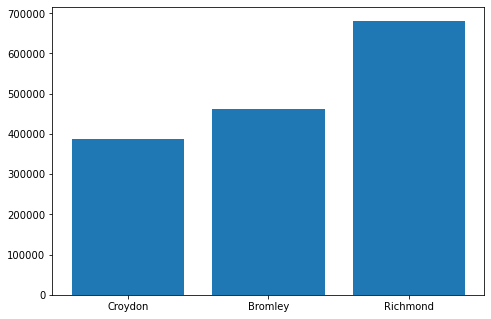

In [41]:
#plotting the average house value in 2018 against the boroughs

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
Q = final['Town']
Z = final['Average house value in 2018']

ax.bar(Q, Z)
plt.show()

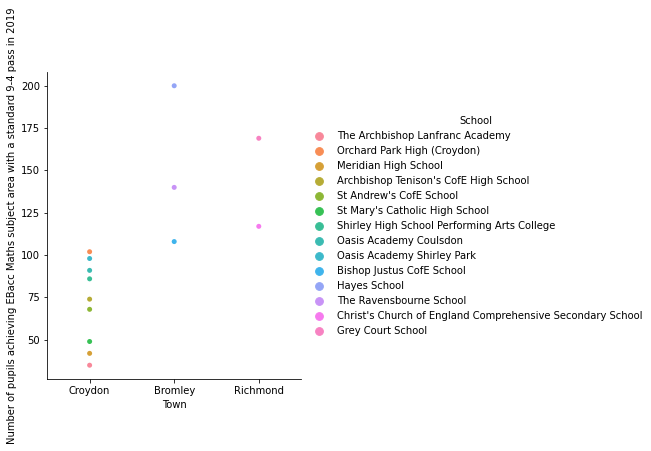

In [42]:
#visualising student performance in Maths in 2019 in the different boroughs

sns.catplot(x="Town", y="Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019", hue="School", aspect=1,
            kind="swarm", data=final)

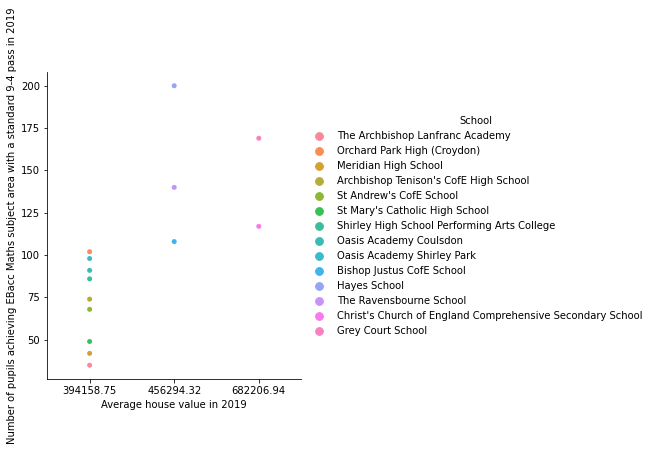

In [43]:
#visualising the relationship between student performance in Maths in 2019 and house prices in the different boroughs

sns.catplot(x="Average house value in 2019", y="Number of pupils achieving EBacc Maths subject area with a standard 9-4 pass in 2019", hue="School", aspect=1,
            kind="swarm", data=final)

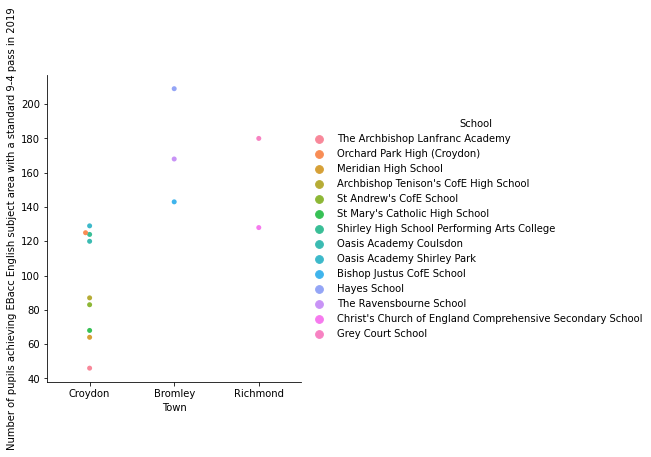

In [44]:
#visualising student performance in Maths in 2019 in the different boroughs

sns.catplot(x="Town", y="Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019", hue="School", aspect=1,
            kind="swarm", data=final)

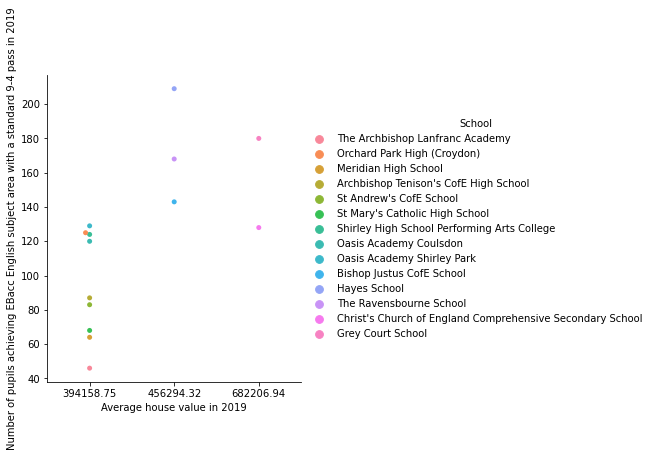

In [45]:
#visualising the relationship between student performance in Maths in 2019 and house prices in the different boroughs

sns.catplot(x="Average house value in 2019", y="Number of pupils achieving EBacc English subject area with a standard 9-4 pass in 2019", hue="School", aspect=1,
            kind="swarm", data=final)